In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("fitbit_stress_score.csv")

df['Date'] = pd.to_datetime(df['Date'])

# 定義移動平均窗口大小
window_size_7 = 7
window_size_30 = 30
window_size_120 = 120

# 計算移動平均值
df['Moving_Average_7'] = df['Score'].rolling(window=window_size_7, min_periods=1).mean()
df['Moving_Average_30'] = df['Score'].rolling(window=window_size_30, min_periods=1).mean()
df['Moving_Average_120'] = df['Score'].rolling(window=window_size_120, min_periods=1).mean()

df

,Date,Score,Moving_Average_7,Moving_Average_30,Moving_Average_120
0,2023-04-22,66.0,66.000000,66.000000,66.000000
1,2023-04-23,NaN,66.000000,66.000000,66.000000
2,2023-04-24,60.0,63.000000,63.000000,63.000000
3,2023-04-25,71.0,65.666667,65.666667,65.666667
4,2023-04-26,NaN,65.666667,65.666667,65.666667
...,...,...,...,...,...
249,2023-12-27,75.0,72.857143,71.923077,72.791667
250,2023-12-28,70.0,72.714286,71.851852,72.760417
251,2023-12-29,73.0,73.000000,71.666667,72.791667
252,2023-12-30,NaN,73.833333,71.692308,72.821053


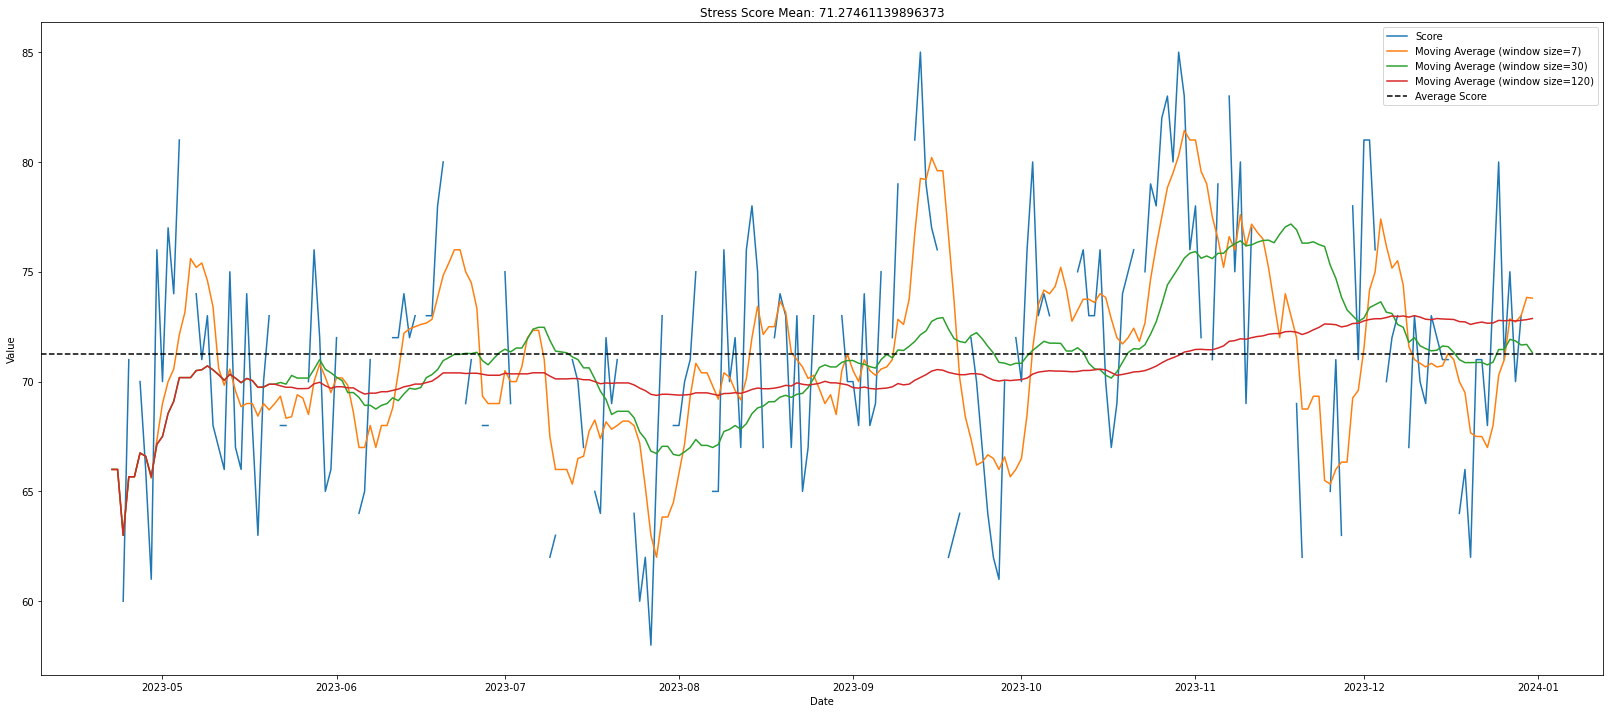

In [3]:
# 設置圖形大小
plt.figure(figsize=(28, 12))

# 設定 window_size
window_size = 5

# 繪製折線圖
plt.plot(df['Date'], df['Score'], label='Score')
plt.plot(df['Date'], df['Moving_Average_7'], label=f'Moving Average (window size={window_size_7})')
plt.plot(df['Date'], df['Moving_Average_30'], label=f'Moving Average (window size={window_size_30})')
plt.plot(df['Date'], df['Moving_Average_120'], label=f'Moving Average (window size={window_size_120})')

# 繪製平均線
plt.axhline(df['Score'].mean(), color='black', linestyle='--', label='Average Score')

# 設置標題和軸標籤
plt.title('Stress Score Mean: ' + str(df['Score'].mean()))
plt.xlabel('Date')
plt.ylabel('Value')

# 添加圖例
plt.legend()